In [422]:
%matplotlib inline

import numpy as np
import seaborn as sns
from pprint import pprint
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import matplotlib

# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (10, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

sns.set(style="whitegrid")
plt.style.use('seaborn-darkgrid')

from dpm.emd import emd, make_distance_matrix


print("""
Generalizes:\n
https://github.com/vincentherrmann/wasserstein-notebook/blob/master/Wasserstein_Kantorovich.ipynb\n
https://vincentherrmann.github.io/blog/wasserstein/

to distributions of different sizes
""")


Generalizes:

https://github.com/vincentherrmann/wasserstein-notebook/blob/master/Wasserstein_Kantorovich.ipynb

https://vincentherrmann.github.io/blog/wasserstein/

to distributions of different sizes



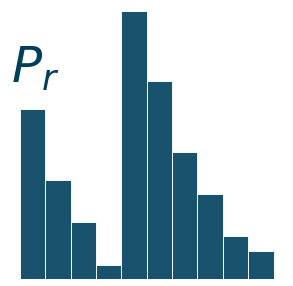

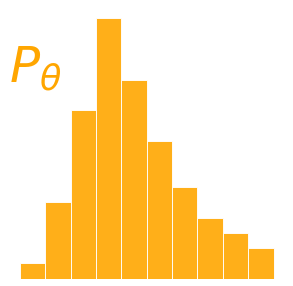

In [541]:
P_r = np.array([12,7,4,1,19,14,9,6,3,2])
P_t = np.array([1,5,11,17,13,9,6,4,3,2])

P_r = P_r / np.sum(P_r)
P_t = P_t / np.sum(P_t)

pr_len = len(P_r)
pt_len = len(P_t)

# fig, ax = plt.subplots(1, 2)

plt.bar(range(pr_len), P_r, 1, color="#003f5c", alpha=0.9)
plt.axis('off')
plt.ylim(0, 0.25)
plt.title(r"$P_r$", y=0.7, x=0.1, color="#003f5c",
          fontweight=100, fontsize=50)
# plt.savefig("discrete_p_r.png", bbox_inches='tight', dpi=300)
plt.show()

plt.bar(range(pt_len), P_t, 1, color="#ffa600", alpha=0.9)
plt.axis('off')
plt.title(r"$P_{\theta}$", y=0.7, x=0.1, color="#ffa600",
          fontweight=100, fontsize=50)
plt.ylim(0, 0.25)
# plt.savefig("discrete_p_t.png", bbox_inches='tight', dpi=300)
plt.show()

In [542]:
emd_primal, gamma_primal = emd(P_r, P_t)

EMD:  0.7062374245472838 



/usr/local/lib/python3.7/site-packages/scipy/optimize/_linprog_util.py:704: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  warn(redundancy_warning, OptimizeWarning)


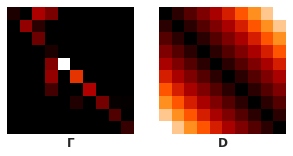

In [543]:
D = make_distance_matrix(len(P_r), len(P_t))
fig, ax = plt.subplots(1, 2)

ax[0].imshow(gamma_primal, cmap=cm.gist_heat, interpolation='nearest')
ax[0].axis('off')
ax[0].set_title(r"$\mathbf{\Gamma}$", y=-0.15)
ax[1].imshow(D, cmap=cm.gist_heat, interpolation='nearest')
ax[1].set_title(r"$\mathbf{D}$", y=-0.15)
ax[1].axis('off')
plt.show()

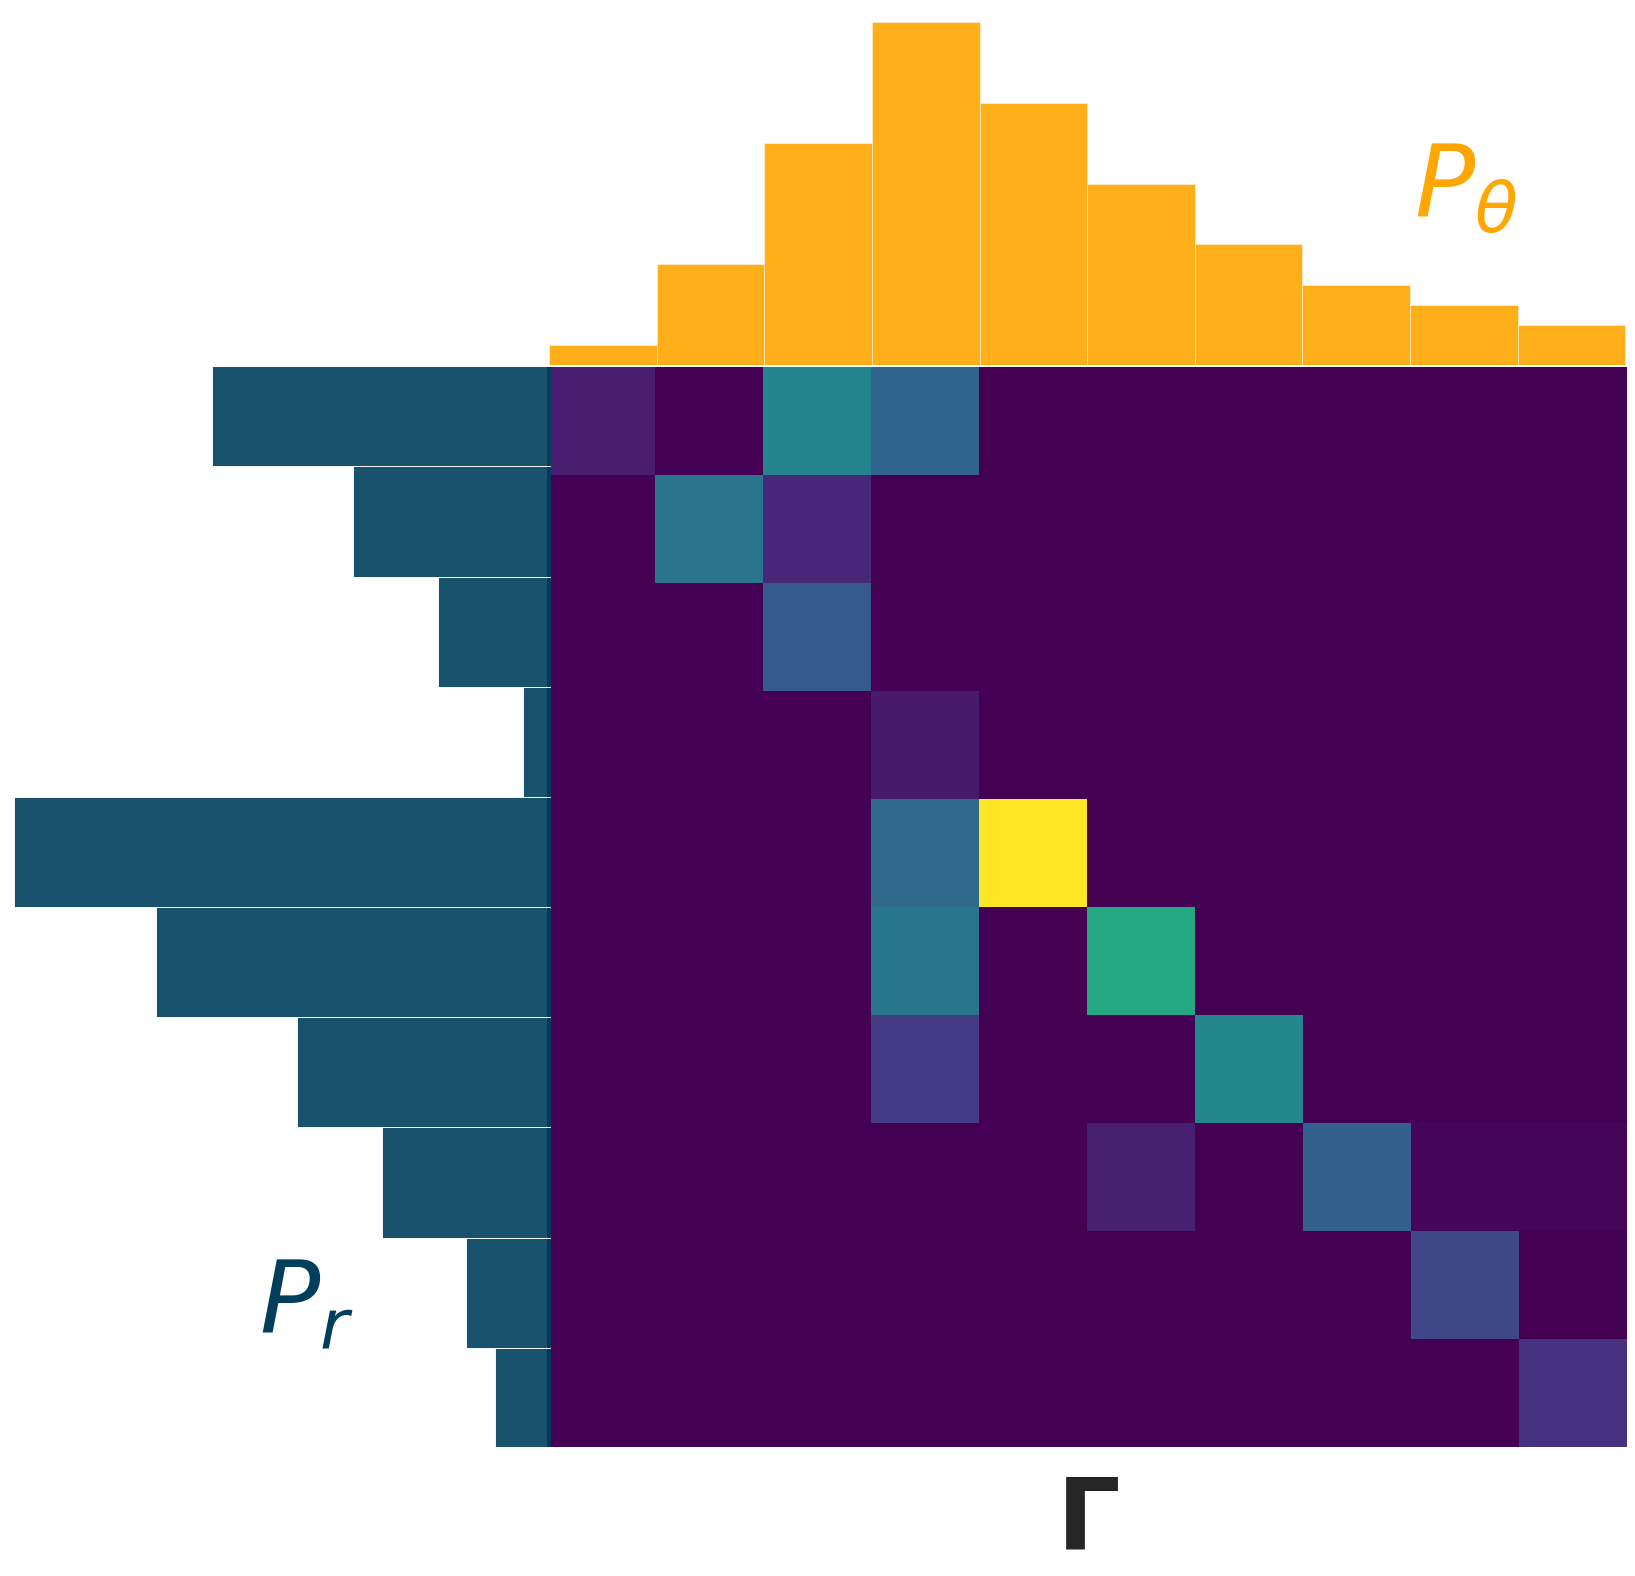

In [544]:
from matplotlib.gridspec import GridSpec
matplotlib.rc('figure', figsize = (5, 5))

fig = plt.figure()
gs = GridSpec(4,4)
gs.update(wspace=-0.01, hspace=0.005)

ax_joint = fig.add_subplot(gs[1:4,0:4])
ax_marg_x = fig.add_subplot(gs[0,1:3])
ax_marg_y = fig.add_subplot(gs[1:4,0])

plt.subplots_adjust(left=-4, right=2, 
                    bottom=-2, top=2, 
                    wspace=-0.01, hspace=0.1)

pt_rng = np.array(list(range(pt_len)))
pr_rng = -np.array(list(range(pr_len)))


ax_joint.imshow(gamma_primal, cmap=cm.viridis, 
                interpolation='nearest')
ax_joint.axis('off')
ax_joint.set_title(r"$\mathbf{\Gamma}$", y=-0.1, x=0.5,
                    fontweight=100, fontsize=100)

ax_marg_x.bar(pt_rng, P_t, 1, color="#ffa600", 
              alpha=0.9, align='center', linewidth=0.5)
ax_marg_x.axis('off')
ax_marg_x.set_xlim(pt_rng.min() - 0.53, pt_rng.max() + 0.53)
ax_marg_x.set_ylim(0, 0.25)
ax_marg_x.set_title(r"$P_{\theta}$", y=0.4, x=0.85,
                    color="#ffa600", fontweight=100, fontsize=100)


ax_marg_y.barh(pr_rng, -P_r, 1, color="#003f5c", alpha=0.9)
ax_marg_y.axis('off')
ax_marg_y.set_xlim(-.25, 0)
ax_marg_y.set_ylim(pr_rng.min() - 0.4, pr_rng.max() + 0.4)
ax_marg_y.set_title(r"$P_{r}$", y=0.1, x=0.55,
                    color="#003f5c", fontweight=100, fontsize=100)

# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

# Set labels on joint
ax_joint.set_xlabel('Joint x label')
ax_joint.set_ylabel('Joint y label')

# Set labels on marginals
ax_marg_y.set_xlabel('Marginal x label')
ax_marg_x.set_ylabel('Marginal y label')
plt.show()

In [545]:
emd_dual, (f, g) = emd(P_r, P_t, dual=True)

dual EMD:  0.7062374245472838


dual EMD:  <function emd at 0x11bf199d8>
f: 
 [ 1.  0. -1. -2. -1.  0.  1.  2.  1.  0.]


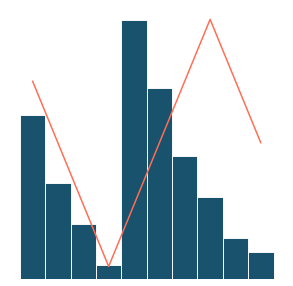

g: 
 [-1.  0.  1.  2.  1.  0. -1. -2. -1.  0.]


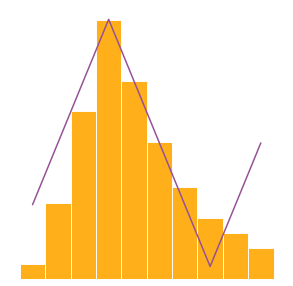

In [546]:
#print(dual_result)
print("dual EMD: ", emd)

print("f: \n", f)
fig, ax1 = plt.subplots()
ax1.bar(range(pr_len), P_r, 1, color="#003f5c", alpha=0.9)
ax1.axis('off')
ax2=ax1.twinx()
ax2.axis('off')
ax2.plot(range(pr_len), f, color="#ff6e54")
# plt.savefig("f_function.svg")
plt.show()


print("g: \n", g)
fig, ax1 = plt.subplots()
ax1.bar(range(pt_len), P_t, 1, color="#ffa600", alpha=0.9)
ax1.axis('off')
ax2=ax1.twinx()
ax2.axis('off')
ax2.plot(range(pt_len), g, color="#955196")
# plt.savefig("f_function.svg")
plt.show()

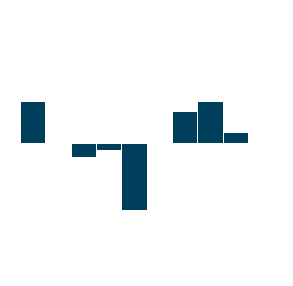

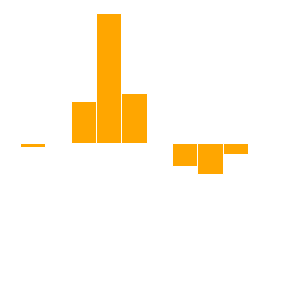

emd:  0.7062374245472836


In [547]:
plt.bar(range(pr_len), np.multiply(P_r, f), 1, color="#003f5c", alpha=1)
plt.axis('off')
plt.ylim(-0.5, 0.5)
# plt.savefig("p_r_f-scaled.svg")
plt.show()

plt.bar(range(pt_len), np.multiply(P_t, g), 1, color="#ffa600", alpha=1)
plt.axis('off')
plt.ylim(-0.5, 0.5)
# plt.savefig("p_t_f-scaled.svg")
plt.show()

#check sum
emd_score = np.sum(np.multiply(P_r, f)) + np.sum(np.multiply(P_t, g))
print("emd: ", emd_score)

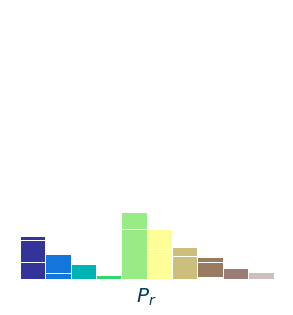

In [548]:
cNorm = colors.Normalize(vmin=0, vmax=pr_len)
colorMap = cm.ScalarMappable(norm=cNorm, cmap=cm.terrain)
r = range(pr_len)

current_bottom = np.zeros(pr_len)

for i in range(pt_len).__reversed__():
	plt.bar(r, gamma_primal[r, i], 1, color=colorMap.to_rgba(r), bottom=current_bottom)
	current_bottom = current_bottom + gamma_primal[r, i]

plt.axis('off')
plt.ylim(0, 1)
plt.title(r"$P_{r}$", y=-0.11, x=0.5,
                    color="#003f5c", fontweight=100, fontsize=20)
# plt.savefig("earth_move_p_r.svg")
plt.show()

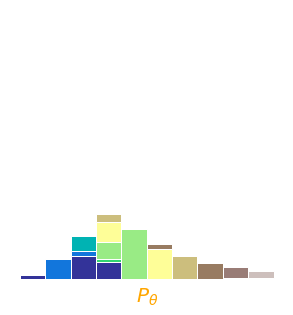

In [549]:
current_bottom = np.zeros(pt_len)
r = range(pt_len)

for i in range(pr_len):
	plt.bar(r, gamma_primal[i, r], 1, color=colorMap.to_rgba(i), bottom=current_bottom)
	current_bottom = current_bottom + gamma_primal[i, r]

plt.axis('off')
plt.ylim(0, 1)
plt.title(r"$P_{\theta}$", y=-0.11, x=0.5,
                    color="#ffa600", fontweight=100, fontsize=20)
# plt.savefig("earth_move_p_t.svg")
plt.show()